In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("age_interest_career_dataset.csv")

# View structure
print(df.head())
print(df.info())

   gender  age age_group  attention_span  creativity_score  logical_reasoning  \
0    Male   11      9-12               4                 4                  6   
1  Female    8       5-8               7                 1                  7   
2    Male   17     16-18               3                 2                 10   
3  Female   15     13-15               6                 1                  7   
4  Female   12      9-12               2                 5                 10   

   verbal_intelligence  visual_intelligence  social_skills  motor_skills  ...  \
0                    4                    7              3             5  ...   
1                   10                   10              5             2  ...   
2                   10                    5              9             3  ...   
3                    3                    3              2             9  ...   
4                   10                    7             10             7  ...   

   Math_Interest  Computer

In [7]:
df.isnull()

,gender,age,age_group,attention_span,creativity_score,logical_reasoning,verbal_intelligence,visual_intelligence,social_skills,motor_skills,...,Math_Interest,Computer_Games,Social_Media_Usage,Technology_Interest,Career_Goals,University_Choices,Future_Planning,primary_interest,secondary_interest,predicted_job
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,False,False


In [5]:
df.isnull().sum()

gender                            0
age                               0
age_group                         0
attention_span                    0
creativity_score                  0
logical_reasoning                 0
verbal_intelligence               0
visual_intelligence               0
social_skills                     0
motor_skills                      0
Fairy_Tale_Interest              73
Motor_Skills_(Group Specific)    73
Color_Cards                      73
Reading_Books                    72
Science_Knowledge                72
Math_Interest                    72
Computer_Games                   82
Social_Media_Usage               82
Technology_Interest              82
Career_Goals                     73
University_Choices               73
Future_Planning                  73
primary_interest                  0
secondary_interest                0
predicted_job                     0
dtype: int64

In [9]:
df.isnull().sum().sum()

900

In [11]:
# Fill numeric columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\Mehvish\AppData\Local\Temp\ipykernel_14564\4107623992.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [13]:
X = df.drop("predicted_job", axis=1)
y = df["predicted_job"]


In [15]:
# Convert all categorical columns in X
X_encoded = pd.get_dummies(X)

# Encode target (if it's a string like 'Games', 'Nature' etc.)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=13)

In [20]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = knn.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.05
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           4       0.20      1.00      0.33         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         4
          25       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         1

    accuracy                           0.05        20
   macro av

C:\Users\Mehvish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mehvish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mehvish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mehvish\anaconda3\Lib\site-packag

In [23]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Apply Logistic Regression
model = LogisticRegression(max_iter=1000)  # increase max_iter if convergence warning
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
#  predictions
y_pred = model.predict(x_test)


In [29]:
#  Evaluation
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))


🔍 Accuracy: 0.1
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           4       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         0
          24       0.00      0.00      

C:\Users\Mehvish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mehvish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mehvish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mehvish\anaconda3\Lib\site-packag

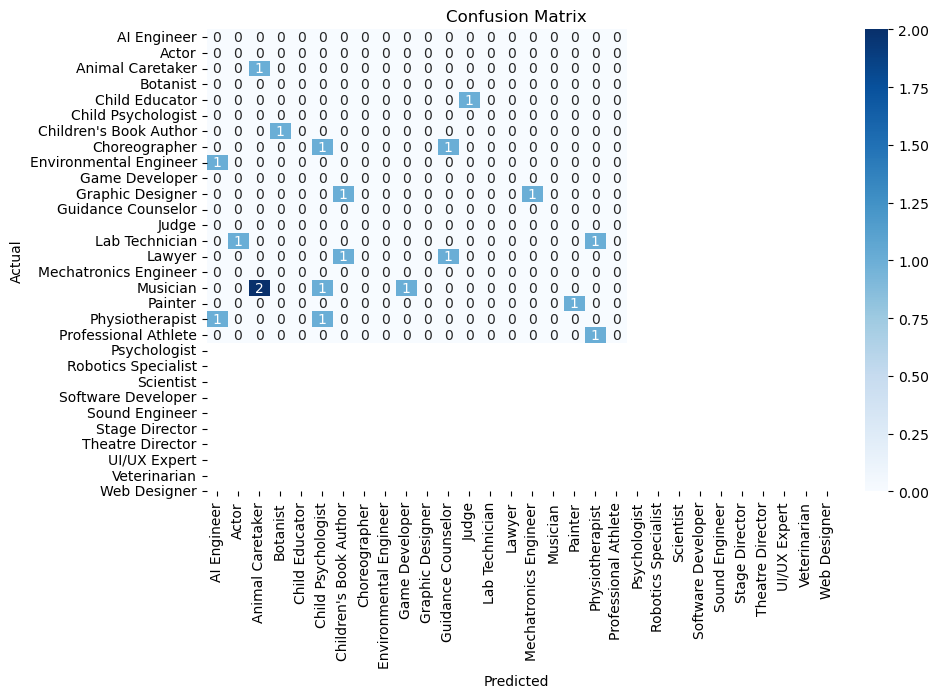

In [31]:
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()